In [1]:
## Importo librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
## leo el archivo
trainlimpio= pd.read_csv('train_con_eda')


In [3]:
#### ahora escalamos los datos numericos de train

from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
scl.fit(trainlimpio[['sqfeet']]) 

trainlimpio['sqfeet'] = scl.transform(trainlimpio[['sqfeet']]) 

#### Comienzo con el modelo: se toman todas las columnas para un mejor análisis

In [4]:
X= trainlimpio[['type', 'sqfeet', 'beds', 'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed','wheelchair_access', 'electric_vehicle_charge', 'comes_furnished', 'laundry_options', 'parking_options', 'region']]
y= trainlimpio[['category_price']]

In [5]:
## Importo Librerias
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [6]:
# Separamos los datos

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [7]:
## Instancio y entreno el modelo
from sklearn.metrics import f1_score
clf = DecisionTreeClassifier(max_depth =100, random_state = 42)
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=100, random_state=42)

In [8]:
## Obtengo mi y_predict con la variabale declarada anteriormente
y_pred = clf.predict(X_test)

In [10]:
## Obtengo las métricas evaluatorias
print('Feature importance: ', clf.feature_importances_)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Recall: ', recall_score(y_test,y_pred))
print('F1 Score: ',f1_score(y_test,y_pred))

Feature importance:  [0.05459265 0.2904817  0.03923646 0.02651621 0.02128212 0.01813606
 0.02685648 0.01168748 0.00239468 0.01426413 0.06252031 0.04605102
 0.3859807 ]
Accuracy:  0.8544465341214401
Recall:  0.7551383179646706
F1 Score:  0.7582552431950023


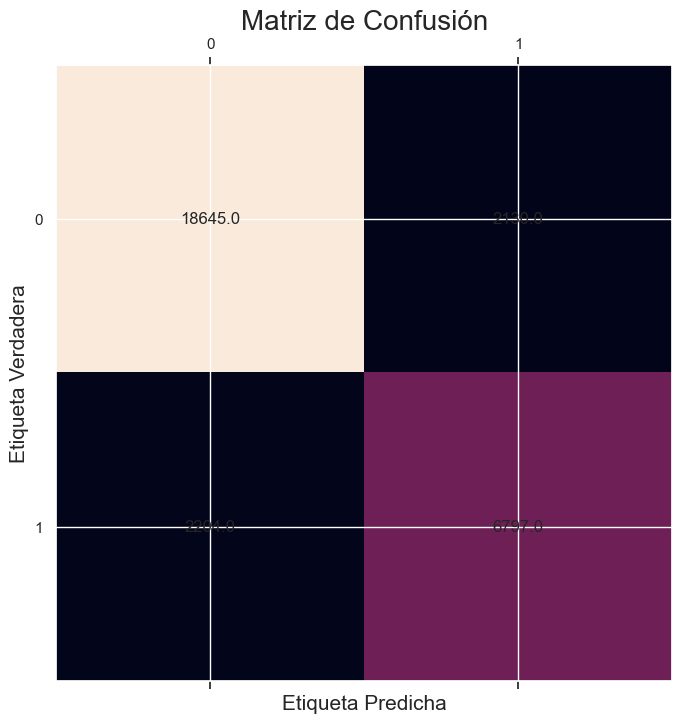

In [12]:
## Obtengo la matriz de confusion para observar mejor los resultados

from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(12,8))
ax.matshow(cm)
plt.title('Matriz de Confusión', fontsize=20)
plt.ylabel('Etiqueta Verdadera', fontsize=15)
plt.xlabel('Etiqueta Predicha', fontsize=15)
for (i, j), z in np.ndenumerate(cm):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

In [13]:
## Reporte de scores
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90     20775
           1       0.76      0.76      0.76      9001

    accuracy                           0.85     29776
   macro avg       0.83      0.83      0.83     29776
weighted avg       0.85      0.85      0.85     29776

